$
\newcommand{\ind}[1]{\left[ #1 \right]}
\newcommand{\E}[1]{\left< {#1} \right>}
\newcommand{\INPUT}[1]{\textbf{Input:} ~ #1}
\newcommand{\FOR}[1]{\textbf{for} ~ #1 ~ \textbf{do}}
\newcommand{\WHILE}[1]{\textbf{while} ~ #1 ~ \textbf{do}}
\newcommand{\RETURN}[1]{\textbf{return} ~ #1}
\newcommand{\IF}[1]{\textbf{if} ~ #1}
\newcommand{\ELSEIF}[1]{\textbf{else if} ~ #1}
\newcommand{\ELSE}{\textbf{else}}
$

# Related Distributions

\begin{eqnarray}
\rho \sim \mathcal{G}(a,b) 
& = & \frac{b^a}{\Gamma(a)} ~ \exp\bigl( (a-1)\log \rho - b \rho \bigr) \\
\theta \sim \mathcal{D}(\alpha) 
& = & \frac{\Gamma(\sum_r \alpha_r)}{\prod_r \Gamma(\alpha_r)} ~ \exp\bigl( \sum_r (\alpha_r-1)\log \theta_r \bigr) \\
r \sim \mathcal{Cat}(\theta) 
& = & \exp(\log \theta_r) \\
x \sim \mathcal{N}(\mu,\rho^{-1}) 
& = & \frac{1}{\sqrt{2 \pi}} ~ 
\exp\Bigl( \frac{1}{2} \log \rho - \frac{1}{2} \rho (x - \mu)^2  \Bigr) \\ 
x \sim \mathcal{N}(\mu,\Lambda^{-1})
& = & \frac{1}{(2 \pi)^{K/2}} ~ 
\exp\Bigl( \frac{1}{2} \log \det(\Lambda) - \frac{1}{2} (x - \mu)^T \Lambda (x - \mu) \Bigr) \\ 
x,\rho \sim \mathcal{NG}(m,\lambda,a,b)
& = & \frac{b^a \sqrt{\lambda}}{\Gamma(a) \sqrt{2 \pi}} ~ 
\exp\Bigl( \bigl(a - \frac{1}{2} \bigr) \log \rho -b \rho - \frac{\lambda}{2} \rho (x - m)^2  \Bigr)
\\
x \sim \mathcal{T}(\nu,\mu,\rho^{-1})
& = & \frac{\Gamma\bigl( \frac{\nu + 1}{2} \bigr)}{\Gamma\bigl( \frac{\nu}{2} \bigr) \sqrt{\pi \nu}} ~ 
\exp\biggl( \frac{1}{2} \log \rho - \frac{\nu + 1}{2} \log\Bigl( 1 + \frac{\rho}{\nu}(x - \mu)^2 \Bigr) \biggr)
\end{eqnarray}

# Continous Naive Bayes Model (Dirichlet-$\mathcal{NG}$ priors)

\begin{align*}
\theta & \sim \mathcal{D}(\alpha) &
\rho_{n \mid r} & \sim \mathcal{G}(a_{n \mid r}, b_{n \mid r}) &
\mu_{n \mid r} & \sim \mathcal{N}(m_{n \mid r}, (\lambda_{n \mid r} \rho_{n \mid r})^{-1}) \\ 
r^{t} & \sim \mathcal{Cat}(\theta) &
x^{t}_{n} & \sim \mathcal{N}(\mu_{n \mid r^t}, \rho_{n \mid r^t}^{-1}) \\
\end{align*}

## Posterior Distribution of  $\rho_{1:N}$, $\mu_{1:N}$ and $\theta$

\begin{eqnarray*}
p(\theta, \rho_{1:N}, \mu_{1:N} \mid r^{1:T}, x_{1:N}^{1:T})
& \propto & 
p( r^{1:T}, x_{1:N}^{1:T}, \theta, \rho_{1:N}, \mu_{1:N}) \\ 
& = & 
\Bigl( p(\theta) \prod_n \prod_r p(\rho_{n \mid r}) ~ p(\mu_{n \mid r} \mid \rho_{n \mid r}) \Bigr)
\Bigl( \prod_{t} p(r^t \mid \theta) \prod_{n} p(x_{n}^{t} \mid r^{t}, \rho_{n}, \mu_{n}) \Bigr) \\
& \propto & 
\Bigl(\prod_r \exp\bigl((\alpha_r-1)\log \theta_r \bigr) \prod_n \exp\Bigl( \bigl(a_{n \mid r} - \frac{1}{2} \bigr) \log \rho_{n \mid r} -b_{n \mid r} \rho_{n \mid r} - \frac{\lambda_{n \mid r}}{2} \rho_{n \mid r} (\mu_{n \mid r} - m_{n \mid r})^2  \Bigr) \Bigr) \\
& &
\Bigl( \prod_{t} \prod_{r} \exp\bigl( \ind{r^t=r} \log \theta_r \bigr) 
\prod_{n} \exp\Bigl( \frac{\ind{r^t=r}}{2} \log \rho_{n \mid r} -  \frac{\ind{r^t=r}}{2} \rho_{n \mid r} (x_{n}^{t} - \mu_{n \mid r})^2  \Bigr)  \Bigr) \\
& \propto &
\mathcal{D}(\theta; \alpha^*) \prod_n \prod_r \mathcal{NG}(\mu_{n \mid r}, \rho_{n \mid r} ;m^*_{n \mid r}, \lambda^*_{n \mid r}, a^*_{n \mid r}, b^*_{n \mid r})
\end{eqnarray*}

where 

\begin{eqnarray}
\alpha^*_r & \equiv & \alpha_r + \sum_t \ind{r^t = r} \\
\lambda^*_{n \mid r} & \equiv & \lambda_{n \mid r} + \sum_t \ind{r^t = r} \\ 
m^*_{n \mid r} & \equiv & \frac{\lambda_{n \mid r} m_{n \mid r} + \sum_t \ind{r^t = r} x_n^t}{\lambda^*_{n \mid r}} \\
a^*_{n \mid r} & \equiv & a_{n \mid r} + \frac{\sum_t \ind{r^t = r}}{2}\\
b^*_{n \mid r} & \equiv & b_{n \mid r} + \frac{1}{2} \bigl( \lambda_{n \mid r} m_{n \mid r}^2 + \sum_t \ind{r^t = r} (x_n^t)^2 - \lambda^*_{n \mid r} (m^*_{n \mid r})^2 \bigr)
\end{eqnarray}

## Marginal distribution of $r^{1:T}$, $x^{1:T}_{1:N}$

\begin{eqnarray*}
p(r^{1:T}, x_{1:N}^{1:T}) 
& = & 
\frac{p(\theta) ~ p(\rho_{1:N}) ~ p(\mu_{1:N}) ~ p(r^{1:T}, x_{1:N}^{1:T} \mid \theta, \rho_{1:N}, \mu_{1:N})}{p(\theta, \rho_{1:N}, \mu_{1:N} \mid r^{1:T}, x_{1:N}^{1:T})} \\
& = & 
\frac{\Bigl( p(\theta) \prod_n \prod_r p(\rho_{n \mid r}) ~ p(\mu_{n \mid r} \mid \rho_{n \mid r}) \Bigr)
\Bigl( \prod_{t} p(r^t \mid \theta) \prod_{n} p(x_{n}^{t} \mid r^{t}, \rho_{n}, \mu_{n}) \Bigr)}
{p(\theta \mid r^{1:T}) \prod_n \prod_r p(\rho_{n \mid r} \mid r^{1:T}, x_{n}^{1:T}) ~ p(\mu_{n \mid r} \mid \rho_{n \mid r}, r^{1:T}, x_{n}^{1:T})} \\
& = & 
\frac{\Bigl( \mathcal{D}(\theta; \alpha) \prod_n \prod_r \mathcal{NG}(\mu_{n \mid r}, \rho_{n \mid r}; m_{n \mid r}, \lambda_{n \mid r}, a_{n \mid r}, b_{n \mid r}) \Bigr)
\Bigl( \prod_{t} \mathcal{Cat}(r^t; \theta) \prod_{n} \mathcal{N}(x_{n}^{t}; \mu_{n \mid r^t}, \rho_{n \mid r^t}^{-1}) \Bigr)}
{\mathcal{D}(\theta; \alpha^*) \prod_n \prod_r \mathcal{NG}(\mu_{n \mid r}, \rho_{n \mid r}; m^*_{n \mid r}, \lambda^*_{n \mid r}, a^*_{n \mid r}, b^*_{n \mid r})} \\
& = &
\frac{1}{(2 \pi)^{NT/2}}
\frac{\Gamma(\sum_r \alpha_r)}{\Gamma(\sum_r \alpha^*_r)} 
\prod_r \frac{ \Gamma(\alpha^*_r)}{\Gamma(\alpha_r)}  
\prod_n \frac{b_{n \mid r}^{a_{n \mid r}}}{{(b^*_{n \mid r})}^{a^*_{n \mid r}}} 
\frac{\Gamma(a^*_{n \mid r})}{\Gamma(a_{n \mid r})} 
\sqrt{\frac{\lambda_{n \mid r}}{\lambda^*_{n \mid r}}}
\end{eqnarray*}

# Complete Graph

\begin{align*}
\theta & \sim \mathcal{D}(\alpha) &
r^{t} & \sim \mathcal{Cat}(\theta) \\
\rho_{1 \mid r} & \sim \mathcal{G}(a_{1 \mid r}, b_{1 \mid r}) &
\rho_{2 \mid r} & \sim \mathcal{G}(a_{2 \mid r}, b_{2 \mid r}) \\ 
\mu_{1 \mid r} & \sim \mathcal{N}(m_{1 \mid r}, (\lambda_{1 \mid r} \rho_{1 \mid r})^{-1}) &
w_{2 \mid r} & \sim \mathcal{N}(m_{2 \mid r}, (\lambda_{2 \mid r} \rho_{2 \mid r} \mathbf{I})^{-1}) \\
x_1^t & \sim \mathcal{N}(\mu_{1 \mid r^t}, \rho_{1 \mid r^t}^{-1}) &
x_2^t & \sim \mathcal{N}(w^T \phi(x_1), \rho_{2 \mid r^t}^{-1})
\end{align*}

## Posterior Distribution of  $\rho_{1:2}$, $\mu_{1}$, $w_{2}$ and $\theta$

\begin{eqnarray*}
p(\theta, \rho_{1:2}, \mu_{1}, w_{2} \mid r^{1:T}, x_{1:2}^{1:T})
& \propto & 
p( r^{1:T}, x_{1:2}^{1:T}, \theta, \rho_{1:2}, \mu_{1}, w_{2}) \\ 
& = & 
\Bigl( p(\theta) \prod_r p(\rho_{1 \mid r}) ~ p(\mu_{1 \mid r} \mid \rho_{1 \mid r}) ~ p(\rho_{2 \mid r}) ~ p(w_{2 \mid r} \mid \rho_{2 \mid r}) \Bigr)
\Bigl( \prod_{t} p(r^t \mid \theta) ~ p(x_{1}^{t} \mid r^{t}, \rho_{1}, \mu_{1}) ~ p(x_{2}^{t} \mid r^{t}, x_{1}^{t}, \rho_{2}, w_{2}) \Bigr) \\
%& \propto & 
%\Bigl(\prod_r \exp\bigl((\alpha_r-1)\log \theta_r \bigr) \prod_n \exp\Bigl( \bigl(a_{n \mid r} - \frac{1}{2} \bigr) \log \rho_{n \mid r} -b_{n \mid r} \rho_{n \mid r} - \frac{\lambda_{n \mid r}}{2} \rho_{n \mid r} (\mu_{n \mid r} - m_{n \mid r})^2  \Bigr) \Bigr) \\
%& &
%\Bigl( \prod_{t} \prod_{r} \exp\bigl( \ind{r^t=r} \log \theta_r \bigr) 
%\prod_{n} \exp\Bigl( \frac{\ind{r^t=r}}{2} \log \rho_{n \mid r} -  \frac{\ind{r^t=r}}{2} \rho_{n \mid r} (x_{n}^{t} - \mu_{n \mid r})^2  \Bigr)  \Bigr) \\
& \propto &
\mathcal{D}(\theta; \alpha^*) \prod_r \mathcal{N}(\mu_{1 \mid r};m^*_{1 \mid r}, (\lambda^*_{1 \mid r} \rho_{1 \mid r})^{-1}) ~ \mathcal{G}(\rho_{1 \mid r} ; a^*_{1 \mid r}, b^*_{1 \mid r}) ~ \mathcal{N} (w_{2 \mid r}; m^*_{2 \mid r}, (\rho_{2 \mid r} \Lambda^*_{2 \mid r})^{-1}) ~ \mathcal{G} (\rho_{2 \mid r}; a^*_{2 \mid r}, b^*_{2 \mid r})
\end{eqnarray*}

where 

\begin{eqnarray}
\alpha^*_r & \equiv & \alpha_r + \sum_t \ind{r^t = r} \\
\lambda^*_{1 \mid r} & \equiv & \lambda_{1 \mid r} + \sum_t \ind{r^t = r} \\ 
m^*_{1 \mid r} & \equiv & \frac{\lambda_{1 \mid r} m_{1 \mid r} + \sum_t \ind{r^t = r} x_1^t}{\lambda^*_{1 \mid r}} \\
a^*_{1 \mid r} & \equiv & a_{1 \mid r} + \frac{\sum_t \ind{r^t = r}}{2}\\
b^*_{1 \mid r} & \equiv & b_{1 \mid r} + \frac{1}{2} \bigl( \sum_t \ind{r^t = r} (x_1^t)^2 + \lambda_{1 \mid r} m_{1 \mid r}^2 - \lambda^*_{1 \mid r} (m^*_{1 \mid r})^2 \bigr)
\end{eqnarray}

and

\begin{eqnarray}
\Lambda^*_{2 \mid r} & \equiv & 
\lambda_{2 \mid r} \mathbf{I} + \sum\nolimits_t \ind{r^t = r} \phi(x_1^t) \phi(x_1^t)^T \\
m^*_{2 \mid r} & \equiv & 
{\Lambda^*_{2 \mid r}}^{-1} 
\bigl(\lambda_{2 \mid r} m_{2 \mid r} + \sum\nolimits_t \ind{r^t = r} x_2^t \phi(x_1^t) \bigr) \\
a^*_{2 \mid r} & \equiv & a_{2 \mid r} + \frac{\sum\nolimits_t \ind{r^t = r}}{2} \\
b^*_{2 \mid r} & \equiv & b_{2 \mid r} + \frac{1}{2} \Bigl(\sum_t \ind{r^t = r} (x_2^t)^2 + \lambda_{2 \mid r} m_{2 \mid r}^T m_{2 \mid r} - {m^*_{2 \mid r}}^T \Lambda^*_{2 \mid r} m^*_{2 \mid r} \Bigr)
\end{eqnarray}

## Marginal distribution of $r^{1:T}$, $x^{1:T}_{1:2}$

\begin{eqnarray}
p(r^{1:T}, x_{1:2}^{1:T}) 
& = & 
\frac{p(\theta) ~ p(\rho_{1:2}) ~ p(\mu_{1}) ~ p(w_{2}) ~ p(r^{1:T}, x_{1:2}^{1:T} \mid \theta, \rho_{1:2}, \mu_{1}, w_{2})}{p(\theta, \rho_{1:2}, \mu_{1}, w_{2} \mid r^{1:T}, x_{1:N}^{1:T})} \\
& = & 
\frac{1}{(2 \pi)^{N/2}}
\frac{\beta_y^{\alpha_y}}{{(\beta'_y)}^{\alpha'_y}} 
\frac{\Gamma(\alpha'_y)}{\Gamma(\alpha_y)}
\sqrt{\frac{\det(\Lambda_w)}{\det(\Lambda'_w)}} \\
& = &
\frac{1}{(2 \pi)^{T}}
\frac{\Gamma(\sum_r \alpha_r)}{\Gamma(\sum_r \alpha^*_r)} 
\prod_r \frac{ \Gamma(\alpha^*_r)}{\Gamma(\alpha_r)}  
\frac{b_{1 \mid r}^{a_{1 \mid r}}}{{(b^*_{1 \mid r})}^{a^*_{1 \mid r}}} 
\frac{b_{2 \mid r}^{a_{2 \mid r}}}{{(b^*_{2 \mid r})}^{a^*_{2 \mid r}}}
\frac{\Gamma(a^*_{1 \mid r})}{\Gamma(a_{1 \mid r})} 
\frac{\Gamma(a^*_{2 \mid r})}{\Gamma(a_{2 \mid r})}
\sqrt{\frac{\lambda_{1 \mid r}}{\lambda^*_{1 \mid r}}}
\sqrt{\det\Bigl(\frac{1}{\lambda_{2 \mid r}} \Lambda^*_{2 \mid r}\Bigr)^{-1}}
\end{eqnarray}

## Sequential Importance Sampling for $p(x_{1:N}^{1:T})$

Proposal distribution:

\begin{eqnarray}
q(r^{1:T}) & \equiv & \prod_{t} q_t (r^t \mid r^{1:t-1}) \\
q_t (r^t \mid r^{1:t-1}) & \equiv & p(r^t \mid r^{1:t-1}, x_{1:N}^{1:t}) 
\label{eq:filtering_distributions} \\
& = & \frac{p(r^{1:t}, x_{1:N}^{1:t})}{\sum_r p( \mathbf{r}^t = r, r^{1:t-1}, x_{1:N}^{1:t})}
\end{eqnarray}

Marginal Likelihood of observed data:

\begin{eqnarray}
p(x_{1:N}^{1:N})
& = & \E{\prod_t p(x_{1:N}^t \mid \mathbf{r}^{1:t-1}, x_{1:N}^{1:t-1})}_{q(\mathbf{r}^{1:T})} \\
& = & \E{\prod_t \frac{\sum_r p(\mathbf{r}^{t} = r, \mathbf{r}^{1:t-1}, x_{1:N}^{1:t})}{p(\mathbf{r}^{1:t-1}, x_{1:N}^{1:t-1})} }_{q(\mathbf{r}^{1:T})}
\end{eqnarray}

### Algorithm

* $\INPUT{x_{1:N}^{1:T}} $
* Initialize $\zeta^{0} \gets 1$
* $\FOR{t=1, \dots, T}$
    * $r^t \sim \frac{p(r^{1:t}, x_{1:N}^{1:t})}{\sum_r p( \mathbf{r}^t = r, r^{1:t-1}, x_{1:N}^{1:t}) } $ 
    * $\zeta^{t} \gets \zeta^{t-1} \frac{\sum_r p(\mathbf{r}^{t} = r, r^{1:t-1}, x_{1:N}^{1:t})}{p(r^{1:t-1}, x_{1:N}^{1:t-1})}$
* $\RETURN{\zeta^{T}}$

# Implementation

In [1]:
include("src/Misc.jl");
include("src/Datasets.jl");
include("src/Tokenizer.jl");

In [2]:
using .Misc, .Tokenizer
import .Datasets

In [3]:
using Statistics, Distributions
using SpecialFunctions, LinearAlgebra

using PyPlot

In [23]:
RESULTS = "./results/tuebingen"

"./results/tuebingen"

## Synthetic Data

In [4]:
function generate(T::Int, K::Int; α_x=1.0, β_x=1.0, α_y=1.0, β_y=1.0,
    λ_μ=1.0, m_μ=0.0, m_w::AbstractArray=zeros(K+1), Λ_w::AbstractArray=Diagonal(ones(K+1)))
    
    ρ_x, ρ_y = rand(Gamma(α_x,1/β_x)), rand(Gamma(α_y,1/β_y))
    μ_x = rand(Normal(m_μ, (λ_μ * ρ_x)^(-1/2)))
    w = rand(MultivariateNormal(m_w, inv(ρ_y .* Λ_w)))
    
    x = rand(Normal(μ_x, ρ_x^(-1/2)),T)
    ϕ = [xᵢ^k for xᵢ ∈ x, k ∈ 0:K]
    y = ϕ * w
    return x, y
end

generate (generic function with 1 method)

In [5]:
T, K = 1000, 4

(1000, 4)

In [6]:
params = Dict(:α_x => 1.0, :β_x => 1.0, :α_y => 16.0, :β_y => 1.0,
              :λ_μ => 10.0, :m_μ => 0.0, :m_w => zeros(K+1), :Λ_w => Diagonal(fill(0.01,K+1)));

In [7]:
x, y = generate(T,K; params...);

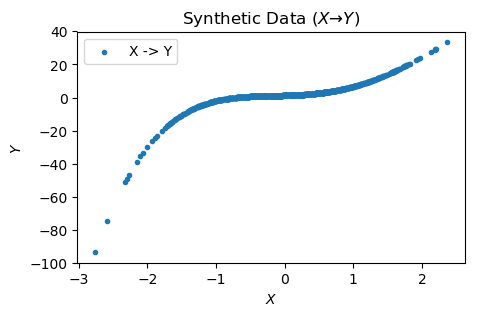

In [8]:
fig = PyPlot.figure(figsize=(5,3))
PyPlot.scatter(x,y;marker=".",label="X -> Y")
PyPlot.title("Synthetic Data (\$ X \\to Y \$)")
PyPlot.xlabel("\$ X \$")
PyPlot.ylabel("\$ Y \$")
PyPlot.legend();

## Marginal Likelihood

In [9]:
function marginal_likelihood(x::AbstractArray,y::AbstractArray,K::Int; α_x=1.0, β_x=1.0, α_y=1.0, β_y=1.0,
    λ_μ=1.0, m_μ=0.0, m_w::AbstractArray=zeros(K+1), Λ_w::AbstractArray=Diagonal(ones(K+1)))
    
    N = length(x)
    log_Pxy = -N*log(2π)
    
    xᵇ = mean(x)
    λᵖ_μ = λ_μ + N
    mᵖ_μ = (λ_μ*m_μ + N*xᵇ)/λᵖ_μ
    αᵖ_x = α_x + N/2
    βᵖ_x = β_x + (sum((x.-xᵇ).^2) + N*λ_μ*(xᵇ-m_μ)^2/λᵖ_μ)/2
    
    log_Pxy += α_x * log(β_x) - lgamma(α_x) + 0.5 * log(λ_μ) 
    log_Pxy -= αᵖ_x * log(βᵖ_x) - lgamma(αᵖ_x) + 0.5 * log(λᵖ_μ)
    
    ϕ = [xᵢ^k for xᵢ ∈ x, k ∈ 0:K]
    wʰ = ϕ \ y
    yʰ = ϕ * wʰ
    Λᵖ_w = Λ_w + ϕ' * ϕ 
    mᵖ_w = Λᵖ_w \ (Λ_w * m_w + ϕ' * y)
    αᵖ_y = α_y + N/2
    βᵖ_y = β_y + (sum(y.^2) + m_w' * Λ_w * m_w - mᵖ_w' * Λᵖ_w * mᵖ_w)/2
    
    log_Pxy += α_y * log(β_y) - lgamma(α_y) + 0.5 * logdet(Λ_w) 
    log_Pxy -= αᵖ_y * log(βᵖ_y) - lgamma(αᵖ_y) + 0.5 * logdet(Λᵖ_w)
    
    return log_Pxy
end

marginal_likelihood (generic function with 1 method)

In [10]:
marginal_likelihood(x,y,K;params...)

435.55716455953507

In [11]:
marginal_likelihood(y,x,K;params...)

-3821.876211703692

## Causal Relationship Determination

In [12]:
function causal_relationship(x::AbstractArray,y::AbstractArray,K::Int;params...)
    xⁿ = (x .- mean(x)) / std(x)
    yⁿ = (y .- mean(y)) / std(y)
    Px2y = marginal_likelihood(xⁿ,yⁿ,K;params...)
    Py2x = marginal_likelihood(yⁿ,xⁿ,K;params...)
    return Px2y > Py2x ? "->" : "<-"
end

causal_relationship (generic function with 1 method)

In [13]:
causal_relationship(x,y,K;params...)

"->"

## Accuracy on Tuebingen Dataset

In [14]:
function causal_accuracy(method, data)
    total_score = 0
    total_weight = 0
    for pair ∈ data
        score = method(pair[:X],pair[:Y]) == pair[:relationship]
        total_score += pair[:weight] * score
        total_weight += pair[:weight]
    end
    return total_score/total_weight
end

causal_accuracy (generic function with 1 method)

In [15]:
valid_pairs = setdiff(1:100,[52,53,54,55,71])
tuebingen_data = Datasets.tuebingen(valid_pairs);

┌ Warning: readtable is deprecated, use CSV.read from the CSV package instead
│   caller = ip:0x0
└ @ Core :-1


In [40]:
K = 4
params = Dict(:α_x => 1000.0, :β_x => 1000.0, :α_y => 16.0, :β_y => 1.0,
              :λ_μ => 100.0, :m_μ => 0.0, :m_w => zeros(K+1), :Λ_w => Diagonal(fill(0.01,K+1)));

In [41]:
bmc = (x::AbstractArray,y::AbstractArray) -> causal_relationship(x,y,K;params...)
@time causal_accuracy(bmc,tuebingen_data)

  0.228754 seconds (54.99 k allocations: 65.036 MiB, 8.37% gc time)


0.6259232696818952

## Parameter Search (Forbidden in Reality)

In [18]:
acc = Float64[]
for K=1:5
    for α_x=1e3, β_x=1e3, λ_μ = 1e2
        for α_y=10.0.^(-5:5), β_y=10.0.^(-5:5), λ_w = 10.0.^(-5:5)
            params = Dict(:α_x => α_x, :β_x => β_x, :α_y => α_y, :β_y => β_y,
                      :λ_μ => λ_μ, :m_μ => 0.0, :m_w => zeros(K+1), :Λ_w => Diagonal(fill(λ_w,K+1)));
            bmc = (x::AbstractArray,y::AbstractArray) -> causal_relationship(x,y,K;params...)
            push!(acc,causal_accuracy(bmc,tuebingen_data))
        end
    end
end

# Plotting Pairs

In [19]:
function plot_pair(pair::Dict{Symbol,Any};ax=PyPlot.gca())
    PyPlot.scatter(pair[:X],pair[:Y];marker=".", label="X $(pair[:relationship]) Y")
    PyPlot.title("$(pair[:id]): $(pair[:dataset])")
    PyPlot.xlabel("X: $(pair[:X_label])")
    PyPlot.ylabel("Y: $(pair[:Y_label])")
    PyPlot.legend()
end

plot_pair (generic function with 1 method)

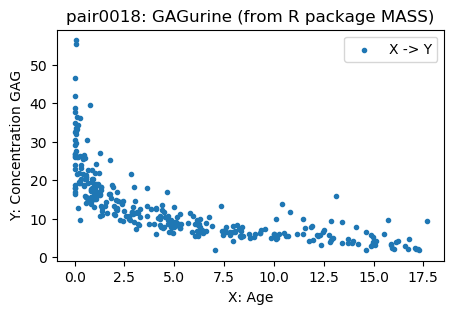

In [20]:
fig = PyPlot.figure(figsize=(5,3))
plot_pair(tuebingen_data[18]);

In [55]:
save_json("$RESULTS/bayesian_regression.json", accuracy=acc);

### Maximum Prediction Accuracy

In [74]:
K = 2
params = Dict(:α_x => 1e3, :β_x => 1e3, :α_y => 1e4, :β_y => 1e5,
              :λ_μ => 1e2, :m_μ => 0.0, :m_w => zeros(K+1), :Λ_w => Diagonal(fill(1e2,K+1)));

In [75]:
bmc = (x::AbstractArray,y::AbstractArray) -> causal_relationship(x,y,K;params...)
@time causal_accuracy(bmc,tuebingen_data)

  0.122942 seconds (51.56 k allocations: 52.139 MiB, 9.75% gc time)


0.7407101568951282